### Import libraries

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [137]:
data = pd.read_csv('../data/raw/FootballData.csv')

In [138]:
data = data.head(5000)

In [139]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 4.0+ MB


### Data cleaning

In [141]:
# xóa các dòng có club_name bị nan
data = data.dropna(subset=['club_name'])
data = data.reset_index(drop=True)
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,05/02/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,07/01/1993,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,05/02/1992,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,169317,https://sofifa.com/player/169317/tarik-elyouno...,T. Elyounoussi,Tarik Elyounoussi,32,23/02/1988,172,66,Norway,Shonan Bellmare,...,61+2,57+2,57+2,57+2,61+2,58+2,53+2,53+2,53+2,58+2
4899,169321,https://sofifa.com/player/169321/miguel-fraga/...,M. Fraga,Miguel Ángel Fraga Licona,32,03/09/1987,184,83,Mexico,Mazatlán FC,...,28+2,34+2,34+2,34+2,28+2,27+2,30+2,30+2,30+2,27+2
4900,169596,https://sofifa.com/player/169596/ryan-shawcros...,R. Shawcross,Ryan Shawcross,32,04/10/1987,191,76,England,Stoke City,...,59+2,66+2,66+2,66+2,59+2,61+2,70+0,70+0,70+0,61+2
4901,172198,https://sofifa.com/player/172198/jessy-moulin/...,J. Moulin,Jessy Moulin,34,13/01/1986,185,88,France,AS Saint-Étienne,...,26+2,27+2,27+2,27+2,26+2,26+2,24+2,24+2,24+2,26+2


In [142]:
# tách bộ dữ liệu gốc ra để lọc ra những feature cần thiết
data_collection = data[['short_name', 'player_positions','overall','potential', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_rank','team_position', 'nationality', 'preferred_foot', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
price = data[['wage_eur', 'value_eur']]

# Lấy các cột từ cột thứ 47 đến cột thứ 80 từ DataFrame data
selected_columns = data.iloc[:, 46:80]

selected_columns

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85,95,70,91,88,96,93,94,91,96,...,75,96,NaN,35,24,6,11,15,14,8
1,84,95,90,82,86,88,81,76,77,92,...,84,95,NaN,32,24,7,11,15,14,11
2,13,11,15,43,13,12,13,14,40,30,...,11,68,NaN,12,18,87,92,78,90,90
3,71,94,85,84,89,85,79,85,70,88,...,88,88,NaN,42,19,15,6,12,8,10
4,85,87,62,87,87,95,88,89,81,95,...,92,93,NaN,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,68,68,67,67,74,74,68,65,50,72,...,65,72,NaN,33,28,15,8,9,14,7
4899,13,11,15,52,10,11,13,10,60,11,...,25,51,NaN,15,15,70,70,74,69,69
4900,30,39,74,56,35,44,34,24,66,53,...,48,64,NaN,68,72,10,12,7,13,15
4901,15,14,15,32,14,13,14,11,35,23,...,23,59,NaN,13,14,72,70,65,68,71


In [143]:
# ghép dataframe sau khi tách
data_total = pd.concat([data_collection, selected_columns], axis=1)

In [144]:
data_total = pd.concat([data_total, price], axis=1)

data_total = data_total.drop(['defending_marking'], axis=1)

In [145]:
data_total.isna().sum()

short_name                      0
player_positions                0
overall                         0
potential                       0
age                             0
height_cm                       0
weight_kg                       0
club_name                       0
league_name                     0
league_rank                     0
team_position                   0
nationality                     0
preferred_foot                  0
pace                          493
shooting                      493
passing                       493
dribbling                     493
defending                     493
physic                        493
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_accel

In [146]:
for col in data_total.columns:
    missing_data = data_total[col].isna().sum() # tong so du lieu bi thieu
    missing_percent = missing_data / len(data_total) * 100
    if missing_percent != 0:
        print(f"Column: {col} has {missing_percent}% missing data")


Column: pace has 10.05506832551499% missing data
Column: shooting has 10.05506832551499% missing data
Column: passing has 10.05506832551499% missing data
Column: dribbling has 10.05506832551499% missing data
Column: defending has 10.05506832551499% missing data
Column: physic has 10.05506832551499% missing data


C:\Users\Admin\AppData\Local\Temp\ipykernel_13784\1991306785.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


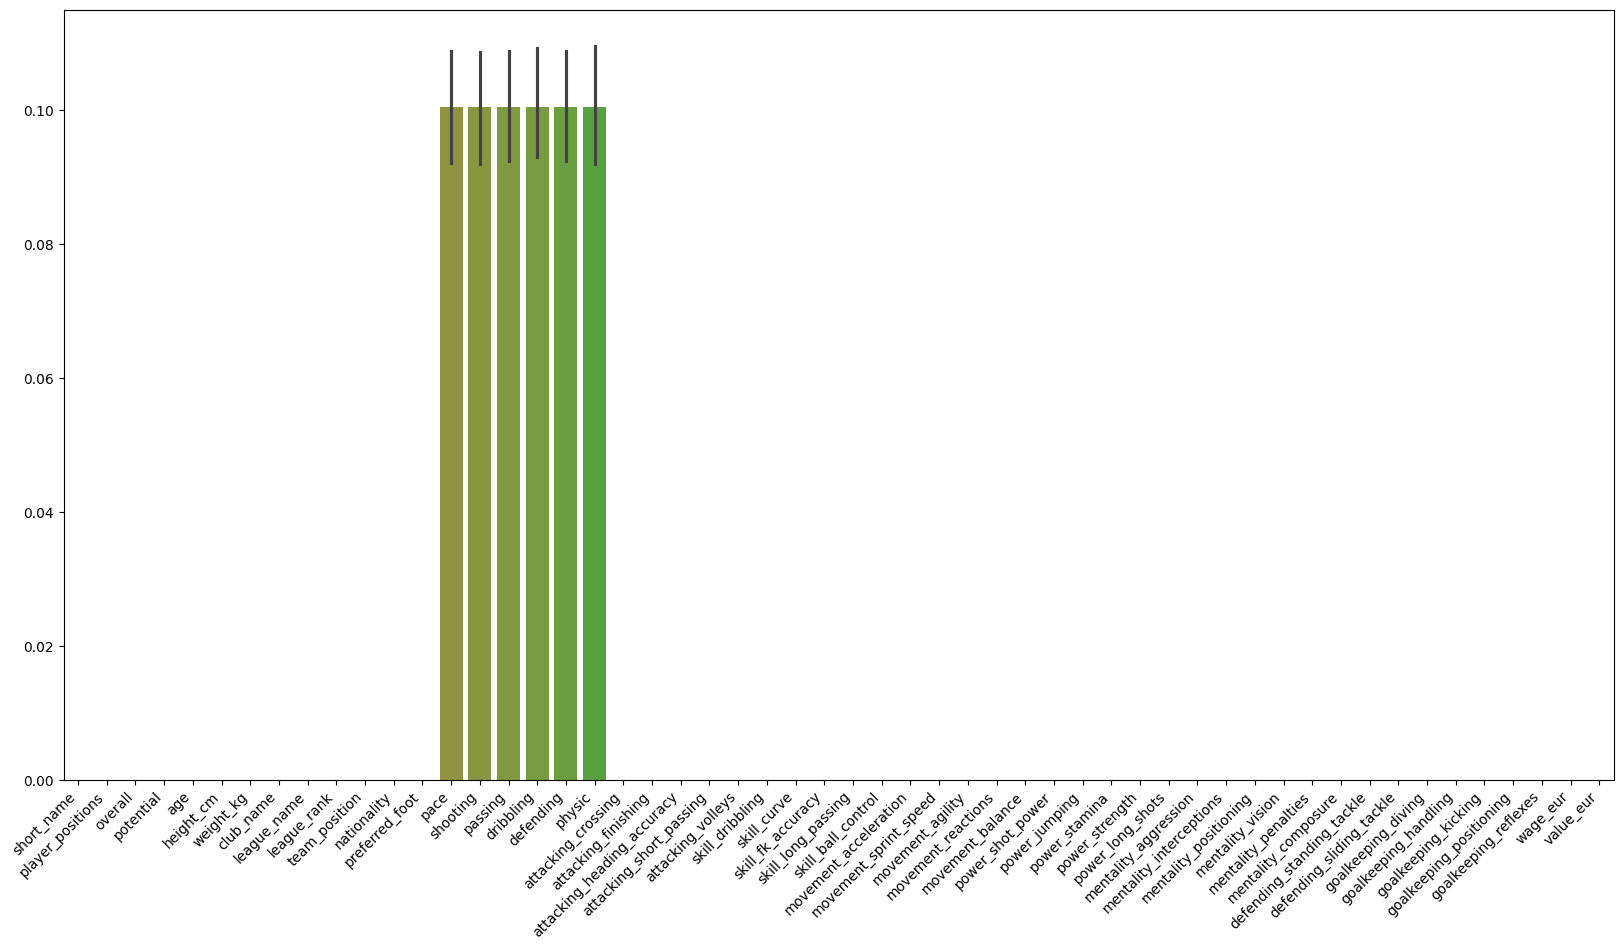

In [147]:

fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data_total.isna())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [148]:
# xóa các dòng có club_name bị nan
data_total = data_total.dropna(subset=['club_name'])
data_total = data_total.reset_index(drop=True)
data_total

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,"RW, ST, CF",93,93,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,96,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,"ST, LW",92,92,35,187,83,Juventus,Italian Serie A,1.0,...,95,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,1.0,...,68,12,18,87,92,78,90,90,125000,75000000
3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,88,42,19,15,6,12,8,10,240000,80000000
4,Neymar Jr,"LW, CAM",91,91,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,93,30,29,9,9,15,15,11,270000,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,T. Elyounoussi,"ST, CAM, CM",70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,1.0,...,72,33,28,15,8,9,14,7,3000,1400000
4899,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,1.0,...,51,15,15,70,70,74,69,69,6000,1100000
4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,2.0,...,64,68,72,10,12,7,13,15,15000,1100000
4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,1.0,...,59,13,14,72,70,65,68,71,12000,775000


In [149]:
# xử lí dữ liệu bị NaN
data_clean = data_total.iloc[:, 13:-2]
mean_values = data_clean.mean(axis=1)
column_means = (data_clean.mean()-10)
print(mean_values)
data_clean.fillna(column_means, inplace=True)
data_clean

0       70.794872
1       70.564103
2       44.060606
3       69.358974
4       68.820513
          ...    
4898    59.410256
4899    39.575758
4900    47.333333
4901    35.696970
4902    55.871795
Length: 4903, dtype: float64


,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,85.000000,92.000000,91.000000,95.000000,38.000000,65.000000,85,95,70,91,...,95,75,96,35,24,6,11,15,14,8
1,89.000000,93.000000,81.000000,89.000000,35.000000,77.000000,84,95,90,82,...,82,84,95,32,24,7,11,15,14,11
2,60.453968,50.917914,56.270748,60.577551,48.509751,60.145125,13,11,15,43,...,65,11,68,12,18,87,92,78,90,90
3,78.000000,91.000000,78.000000,85.000000,43.000000,82.000000,71,94,85,84,...,79,88,88,42,19,15,6,12,8,10
4,91.000000,85.000000,86.000000,94.000000,36.000000,59.000000,85,87,62,87,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,77.000000,69.000000,66.000000,74.000000,47.000000,63.000000,68,68,67,67,...,74,65,72,33,28,15,8,9,14,7
4899,60.453968,50.917914,56.270748,60.577551,48.509751,60.145125,13,11,15,52,...,62,25,51,15,15,70,70,74,69,69
4900,40.000000,37.000000,46.000000,49.000000,70.000000,81.000000,30,39,74,56,...,40,48,64,68,72,10,12,7,13,15
4901,60.453968,50.917914,56.270748,60.577551,48.509751,60.145125,15,14,15,32,...,29,23,59,13,14,72,70,65,68,71


In [150]:
price

,wage_eur,value_eur
0,560000,67500000
1,220000,46000000
2,125000,75000000
3,240000,80000000
4,270000,90000000
...,...,...
4898,3000,1400000
4899,6000,1100000
4900,15000,1100000
4901,12000,775000


In [151]:
data_info = data_total[['short_name', 'player_positions','overall','potential', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name', 'league_rank','team_position', 'nationality', 'preferred_foot']]

data_total = pd.concat([data_info, data_clean], axis=1)
data_total = pd.concat([data_total, price], axis=1)
data_total

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,"RW, ST, CF",93,93,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,96,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,"ST, LW",92,92,35,187,83,Juventus,Italian Serie A,1.0,...,95,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,1.0,...,68,12,18,87,92,78,90,90,125000,75000000
3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,88,42,19,15,6,12,8,10,240000,80000000
4,Neymar Jr,"LW, CAM",91,91,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,93,30,29,9,9,15,15,11,270000,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,T. Elyounoussi,"ST, CAM, CM",70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,1.0,...,72,33,28,15,8,9,14,7,3000,1400000
4899,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,1.0,...,51,15,15,70,70,74,69,69,6000,1100000
4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,2.0,...,64,68,72,10,12,7,13,15,15000,1100000
4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,1.0,...,59,13,14,72,70,65,68,71,12000,775000


In [152]:
data_total['player_positions'] = data_total['player_positions'].apply(lambda x: x.split(',')[0].strip())
data_total

,short_name,player_positions,overall,potential,age,height_cm,weight_kg,club_name,league_name,league_rank,...,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,wage_eur,value_eur
0,L. Messi,RW,93,93,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,96,35,24,6,11,15,14,8,560000,67500000
1,Cristiano Ronaldo,ST,92,92,35,187,83,Juventus,Italian Serie A,1.0,...,95,32,24,7,11,15,14,11,220000,46000000
2,J. Oblak,GK,91,93,27,188,87,Atlético Madrid,Spain Primera Division,1.0,...,68,12,18,87,92,78,90,90,125000,75000000
3,R. Lewandowski,ST,91,91,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,88,42,19,15,6,12,8,10,240000,80000000
4,Neymar Jr,LW,91,91,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,93,30,29,9,9,15,15,11,270000,90000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898,T. Elyounoussi,ST,70,70,32,172,66,Shonan Bellmare,Japanese J. League Division 1,1.0,...,72,33,28,15,8,9,14,7,3000,1400000
4899,M. Fraga,GK,70,70,32,184,83,Mazatlán FC,Mexican Liga MX,1.0,...,51,15,15,70,70,74,69,69,6000,1100000
4900,R. Shawcross,CB,70,70,32,191,76,Stoke City,English League Championship,2.0,...,64,68,72,10,12,7,13,15,15000,1100000
4901,J. Moulin,GK,70,70,34,185,88,AS Saint-Étienne,French Ligue 1,1.0,...,59,13,14,72,70,65,68,71,12000,775000


In [153]:
# lưu dữ liệu vào file csv
data_total.to_csv('data_clean.csv')